In [1]:
# Installing necessary libraries
# pip install numpy,pandas,seaborn,matplotlib,plotly,dash 

# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Setting up matplotlib for inline plotting
%matplotlib inline

# Define your custom color palette
colors = px.colors.qualitative.Dark2

In [4]:
# Reading into a dataframe
raw_data = pd.read_csv('raw_data.csv')

In [5]:
# Displaying information about the dataset, including the data types, non-null counts, and memory usage.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# Generating descriptive statistics for the 'Purchase Amount (USD)' column
raw_data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Clusters
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,4.666923
std,1125.977353,15.207589,23.685392,0.716223,14.447125,3.278644
min,1.000000,18.000000,20.000000,2.500000,1.000000,0.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000,2.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,5.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,7.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000,11.000000


In [ ]:
# Counting the frequency of unique values in the 'Frequency of Purchases' column
for column in raw_data.columns:
    if raw_data[column].dtype == 'object':
        # Printing the value counts for the categorical column
        print(raw_data[column].value_counts())
        print()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West

In [ ]:
#Displaying the data
raw_data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Clusters,Clusters Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,Cluster 0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,Cluster 0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,Cluster 0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,7,Cluster 7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,5,Cluster 5
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,1,Cluster 1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,1,Cluster 1
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,6,Cluster 6


In [ ]:
#Selecting all columns except the ID column (case insensitive)
features = [col for col in raw_data.columns[1:] if 'ID' not in col.lower()]
features

['Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases',
 'Clusters',
 'Clusters Category']

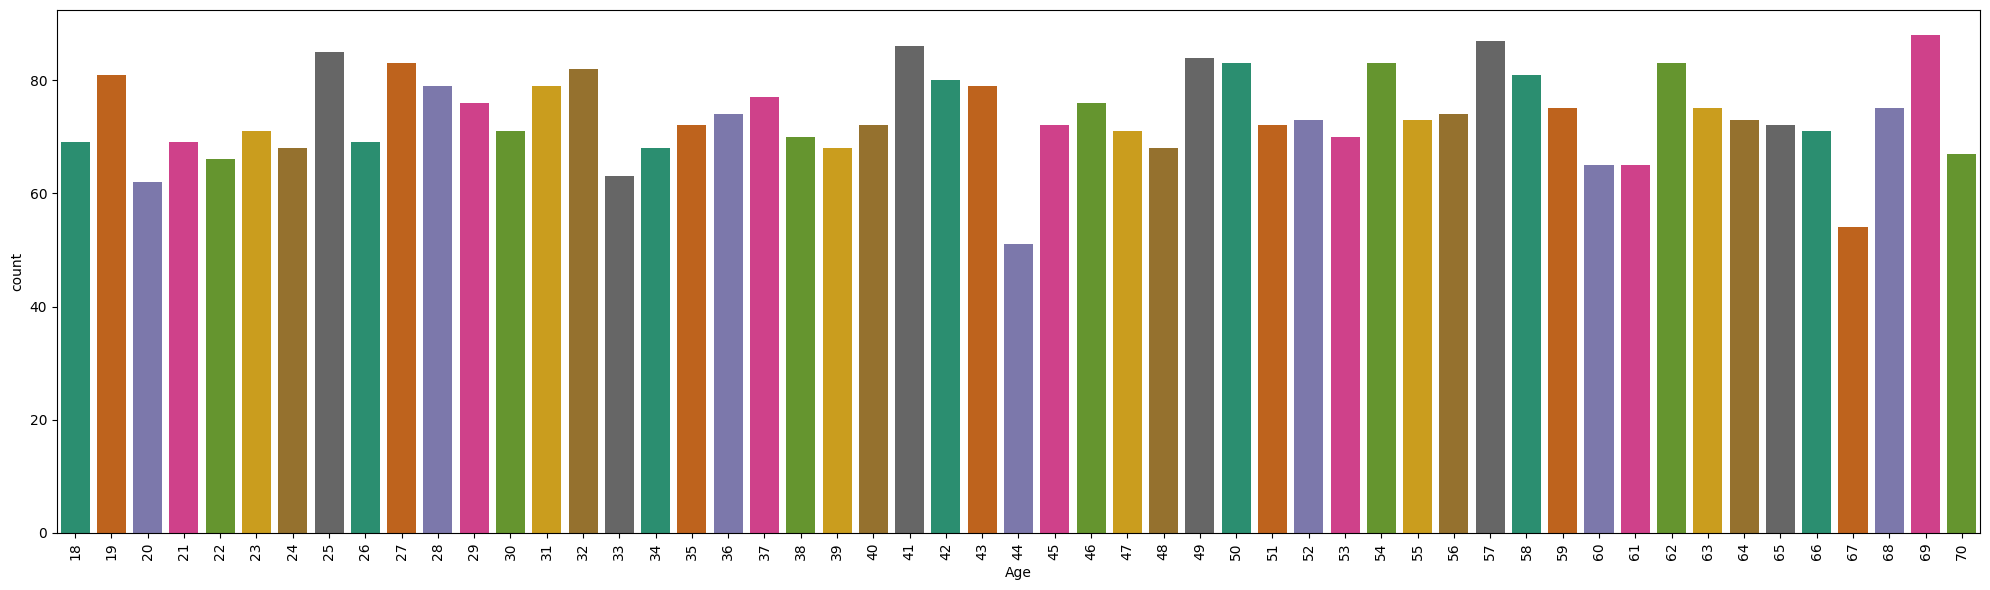

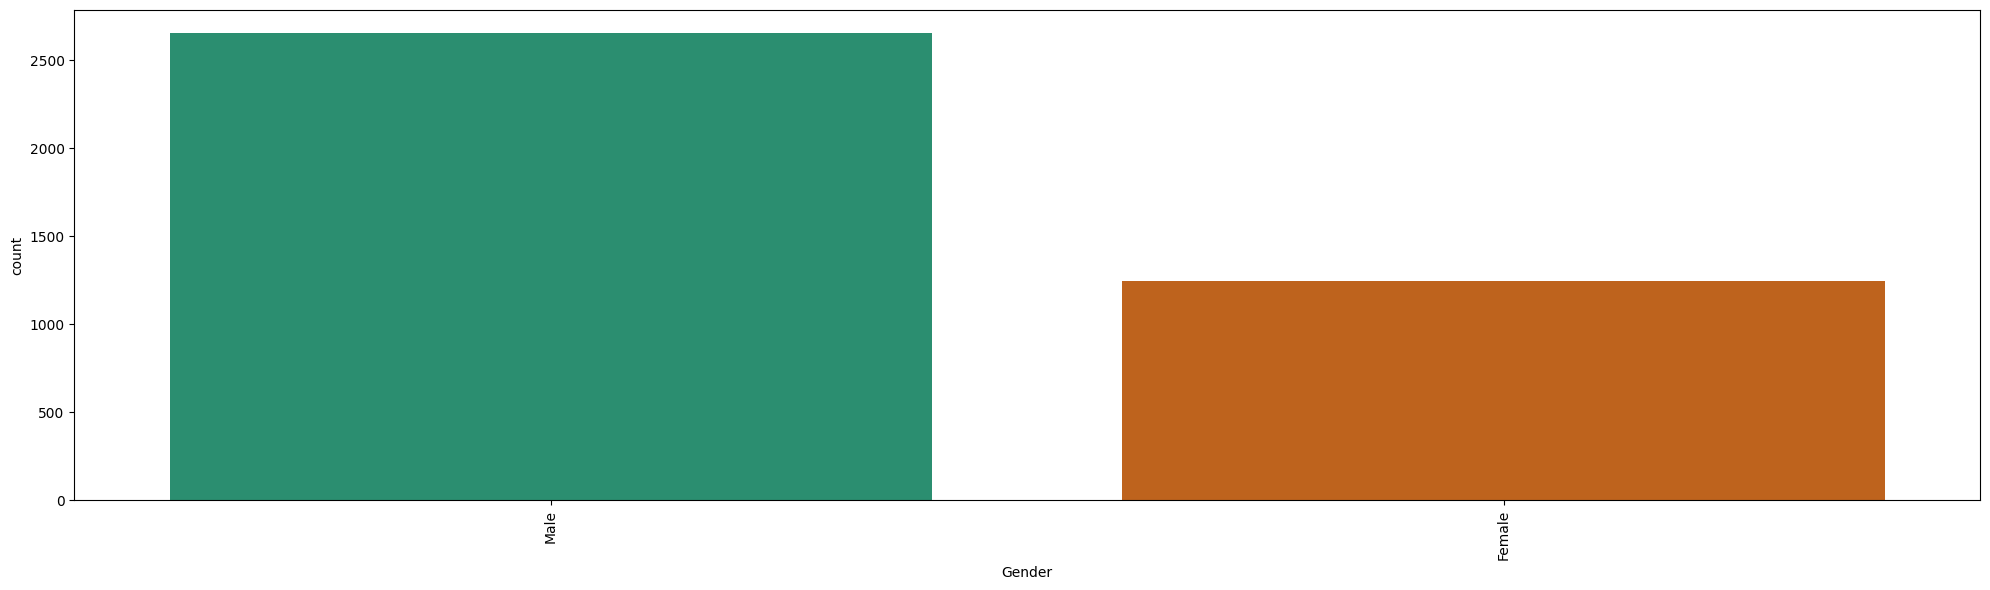

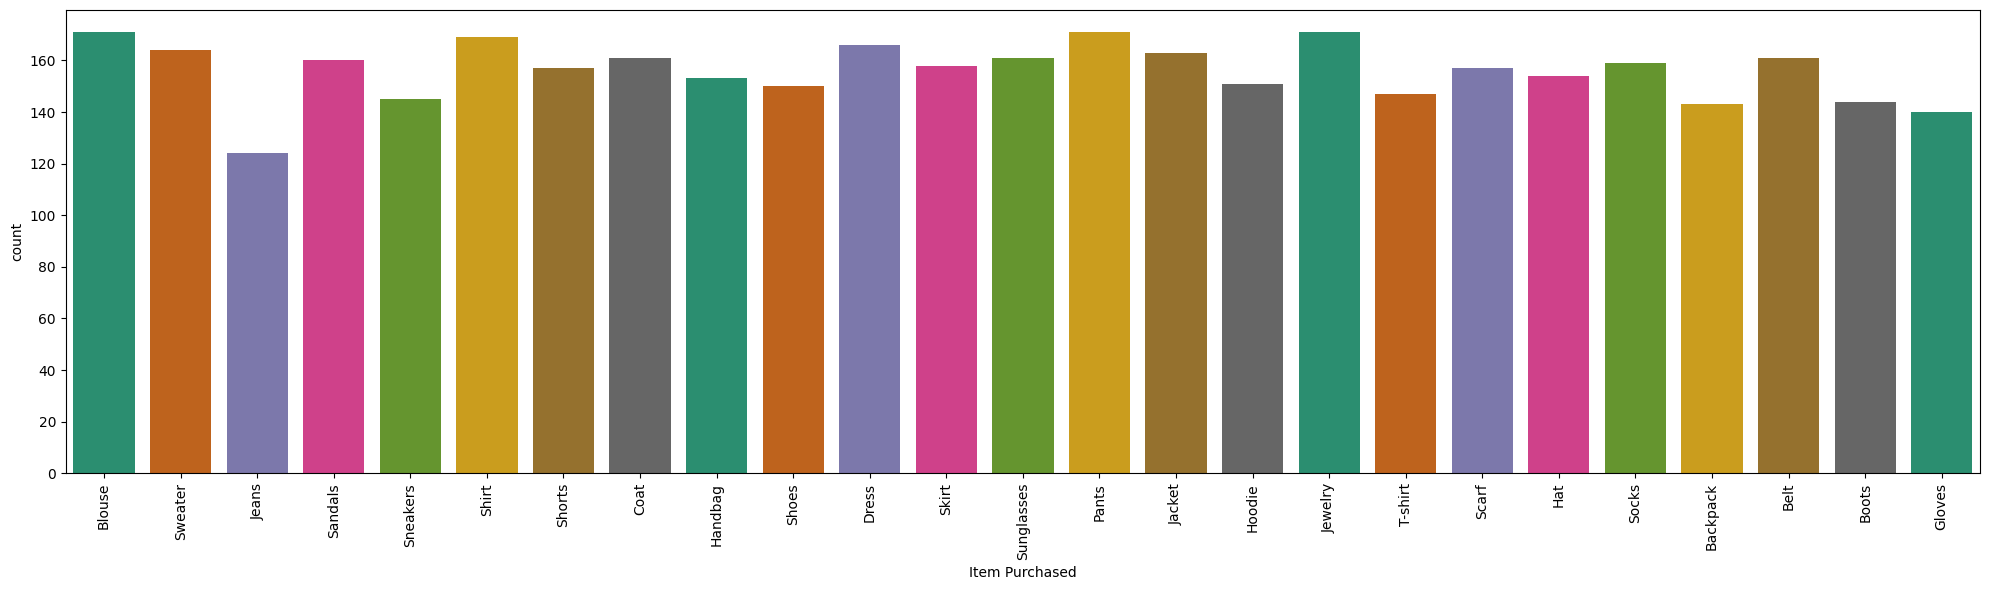

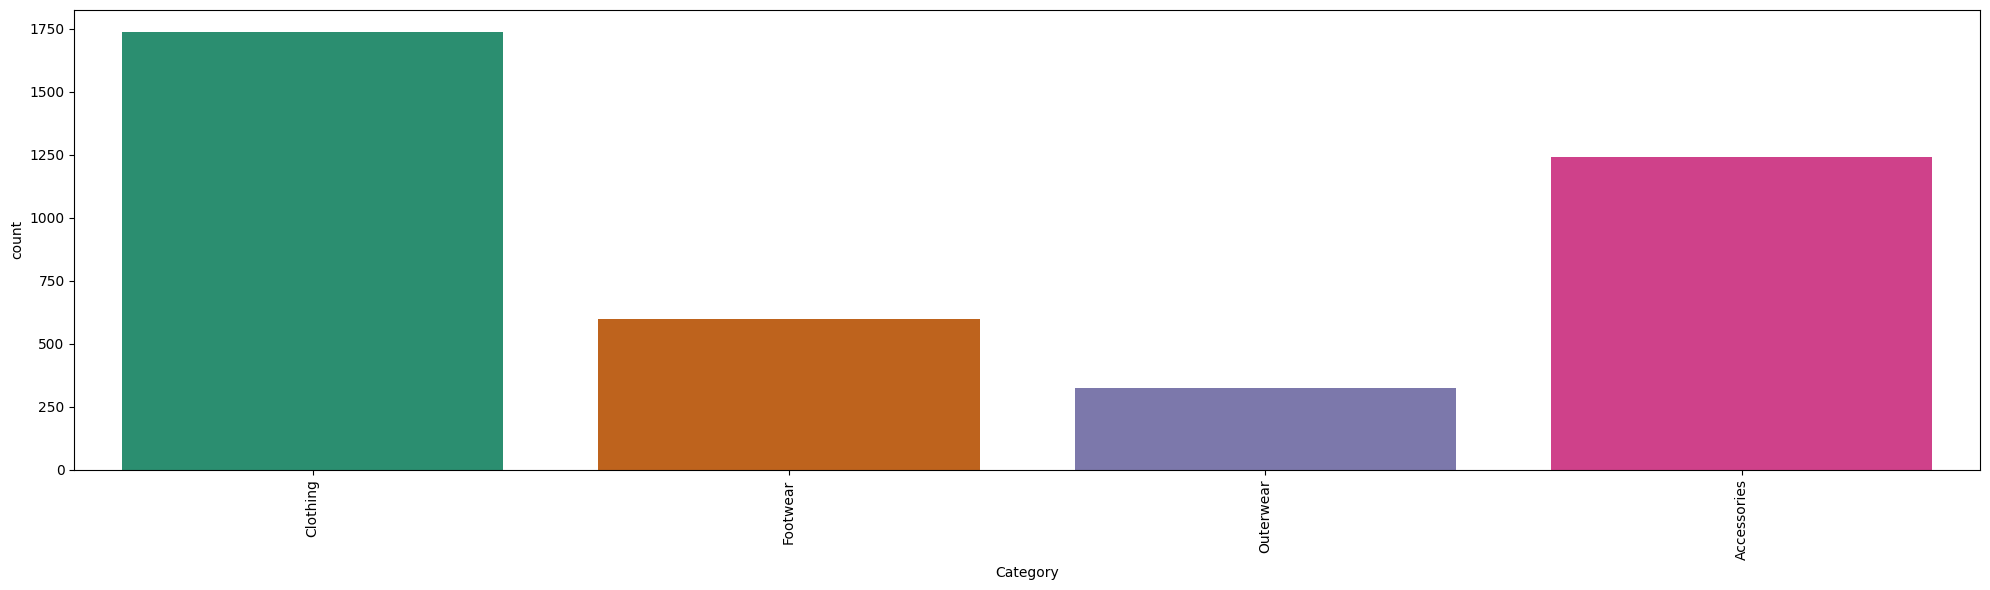

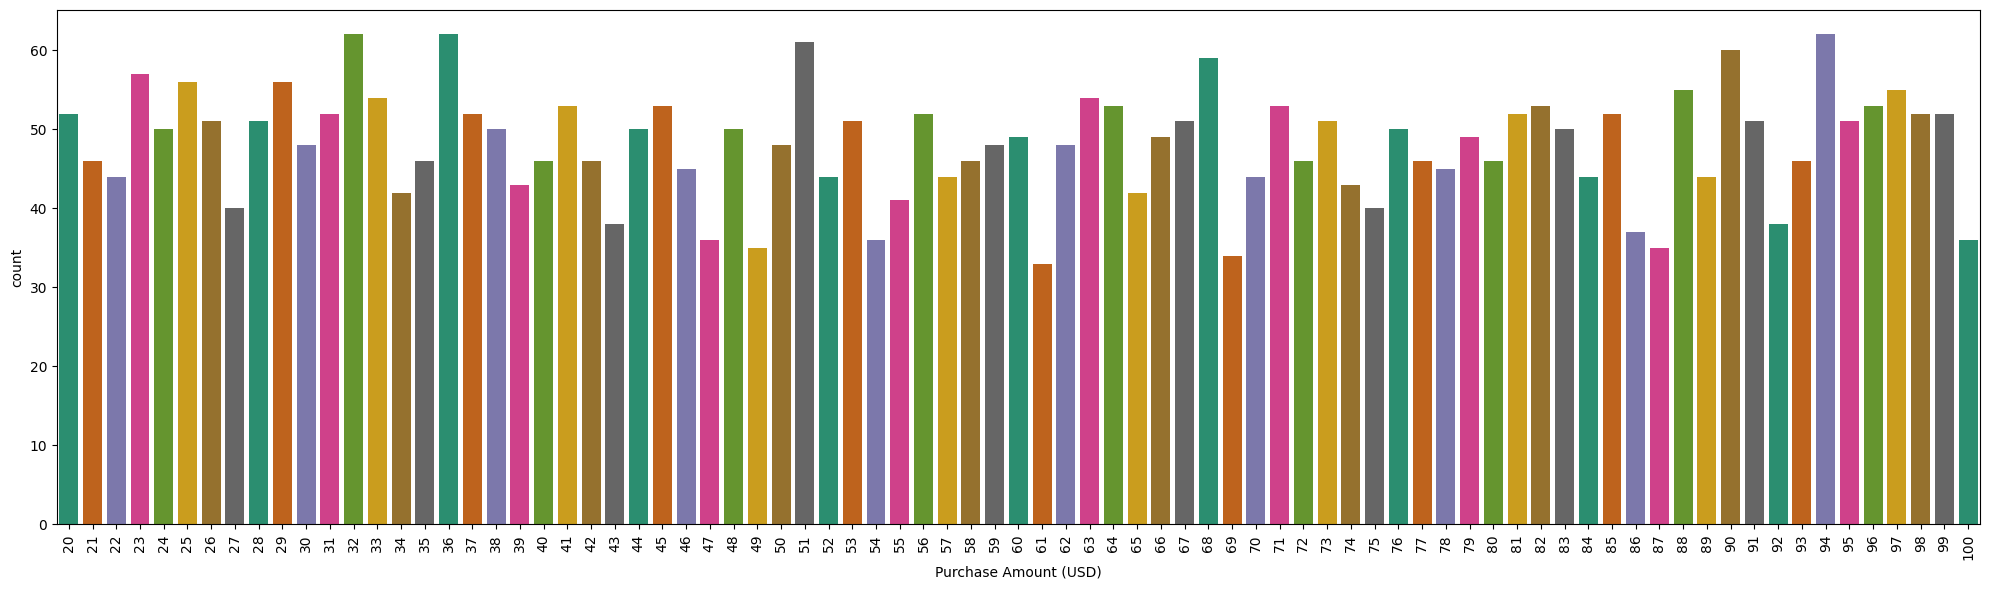

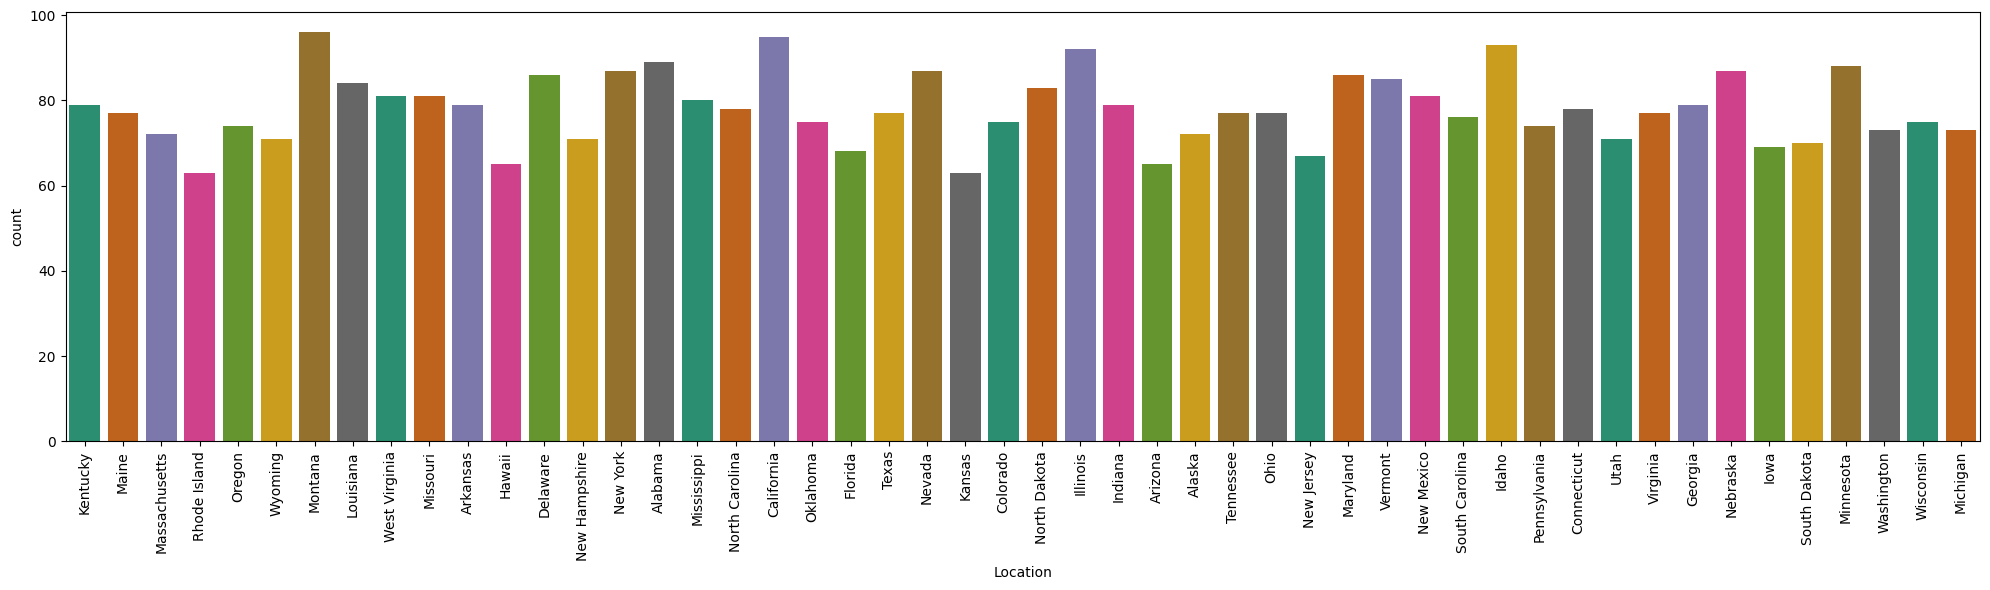

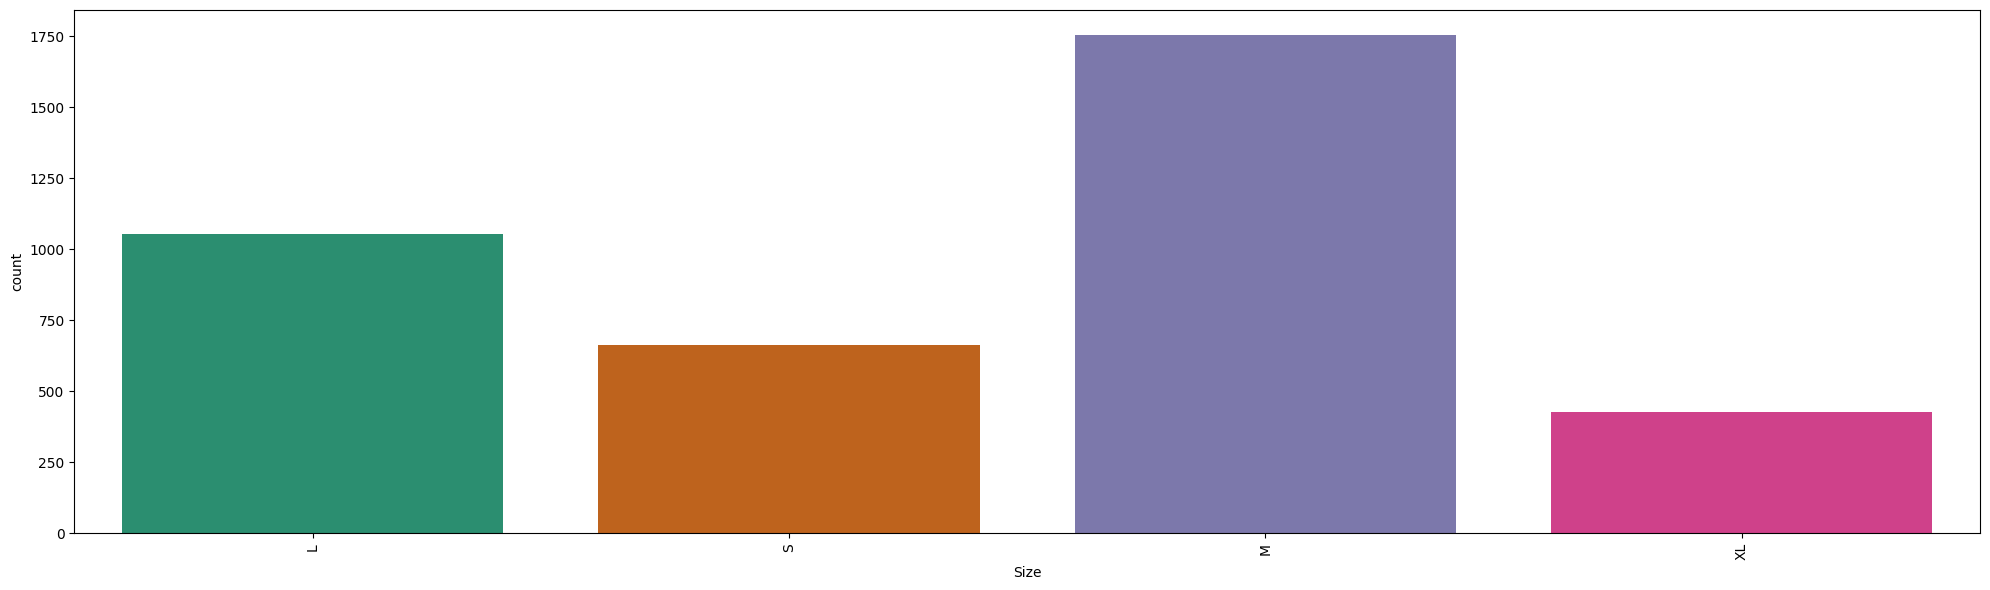

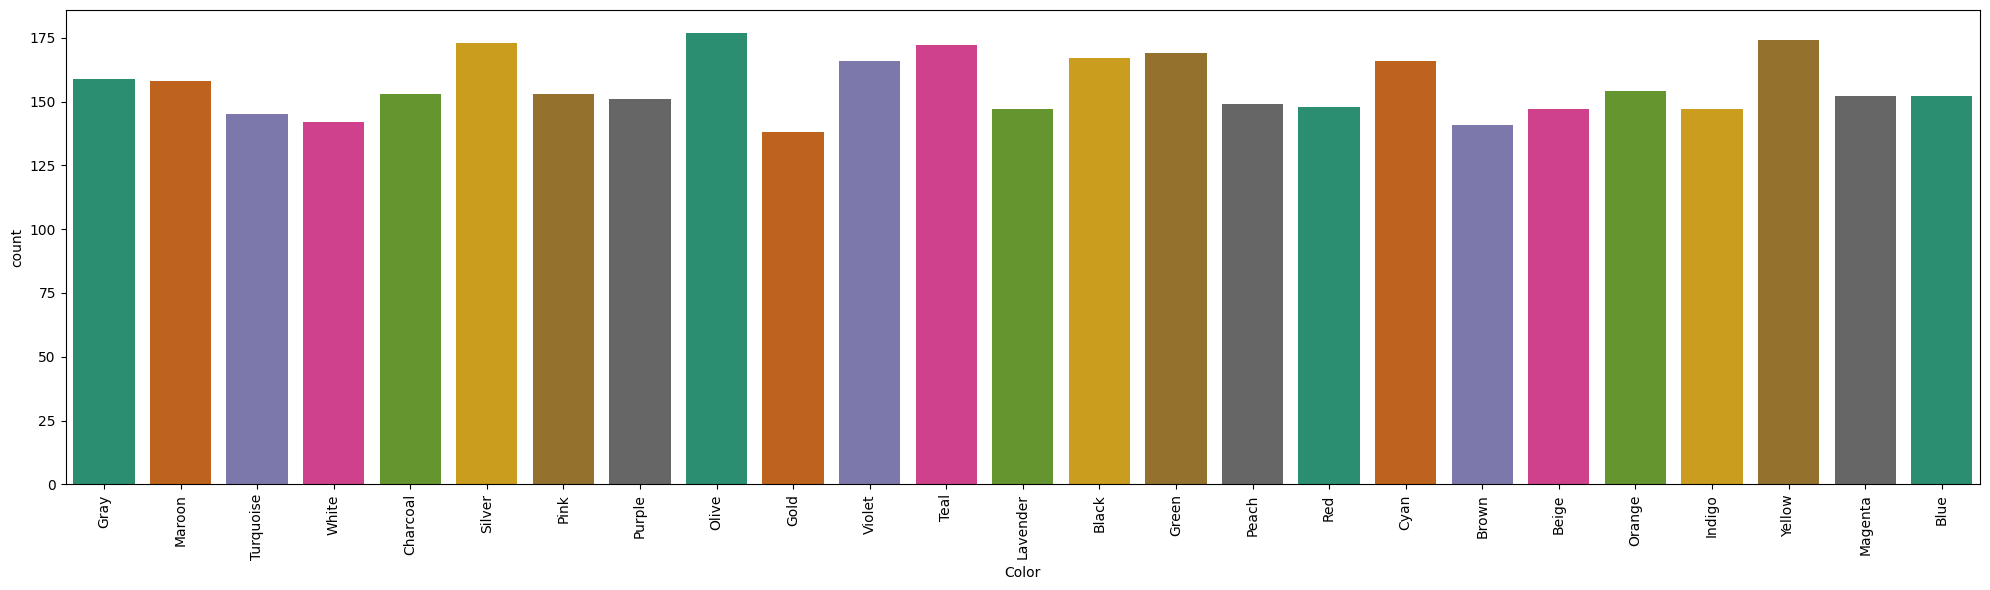

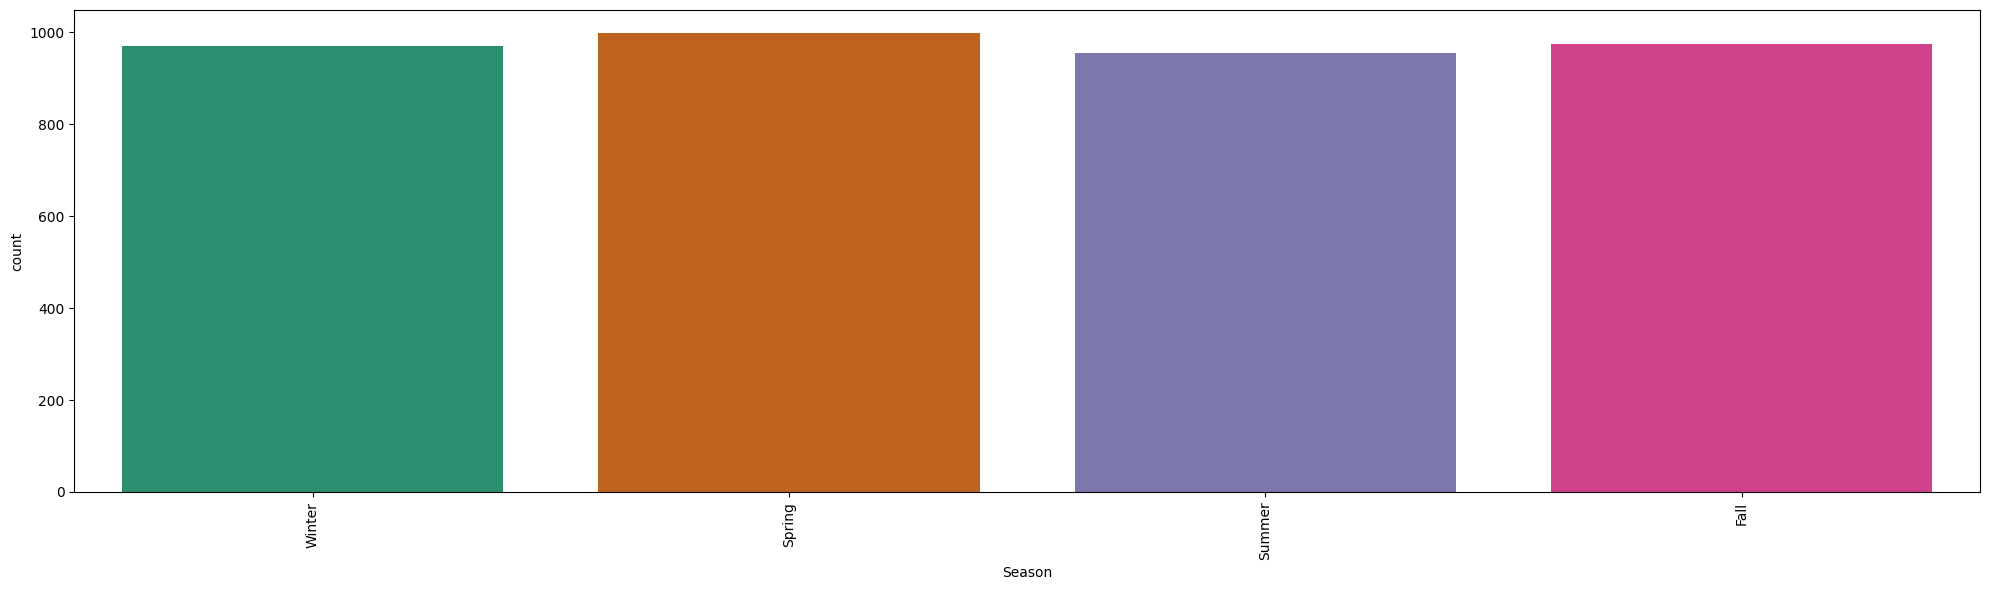

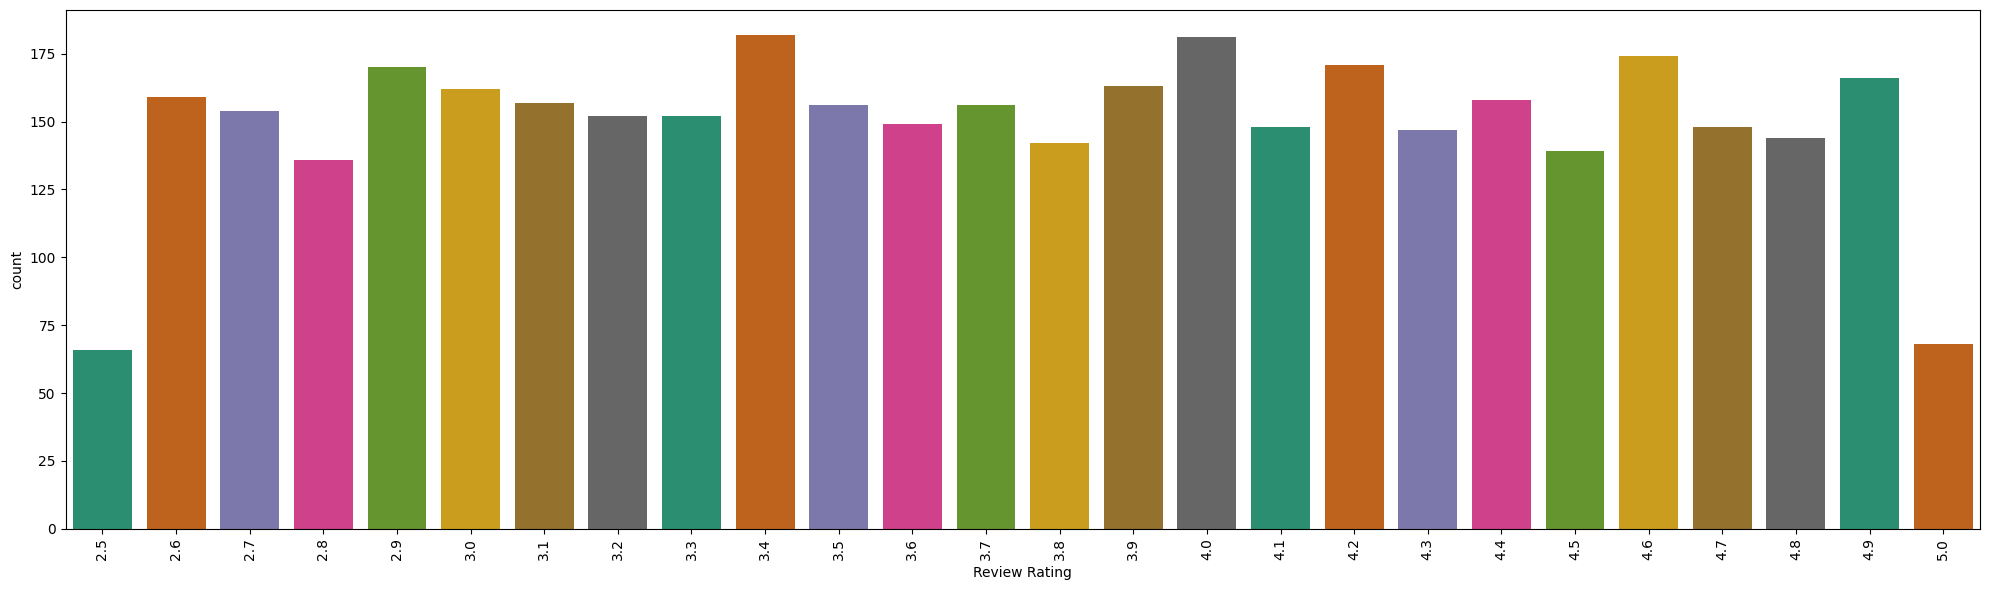

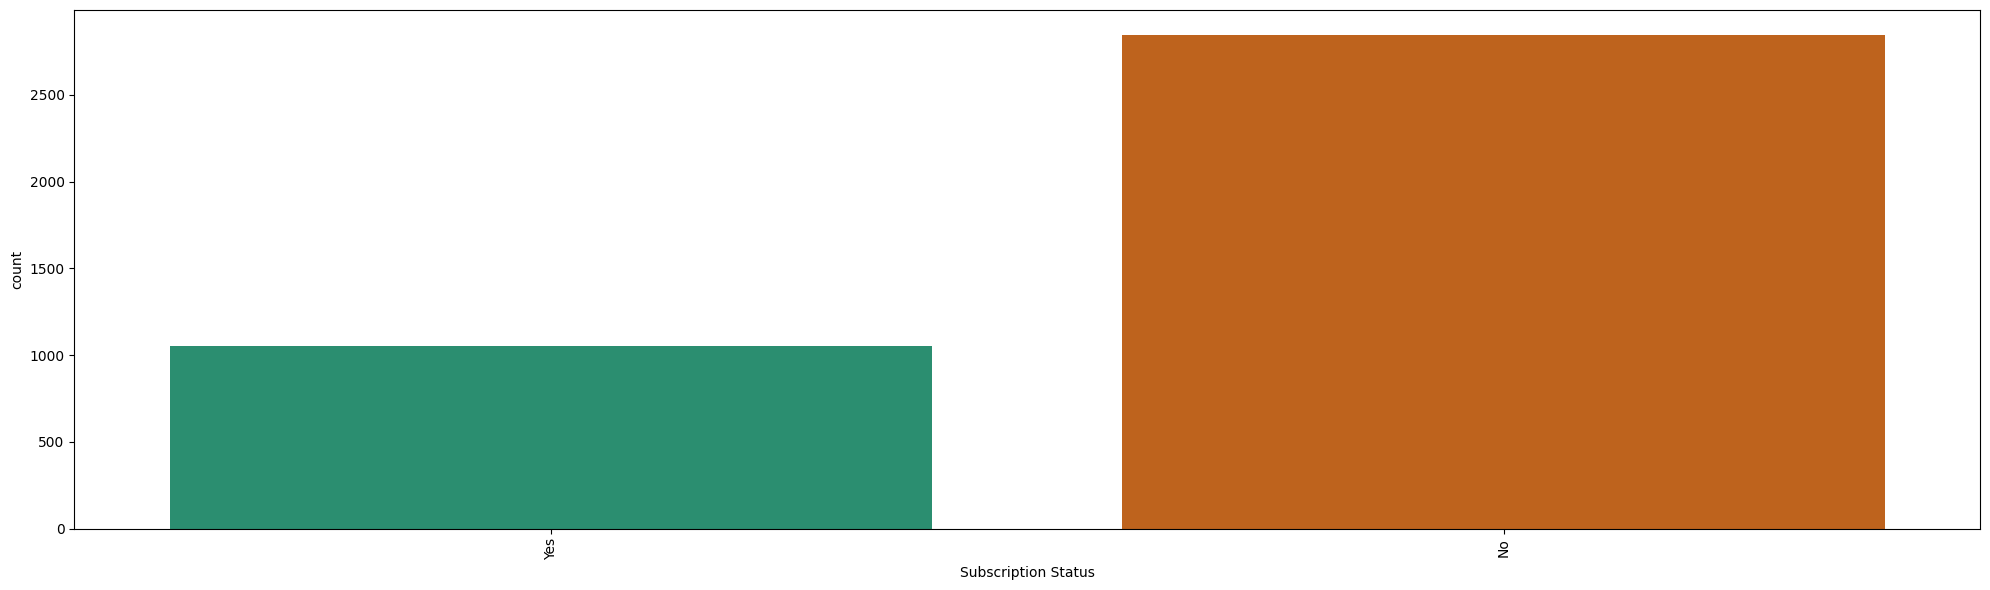

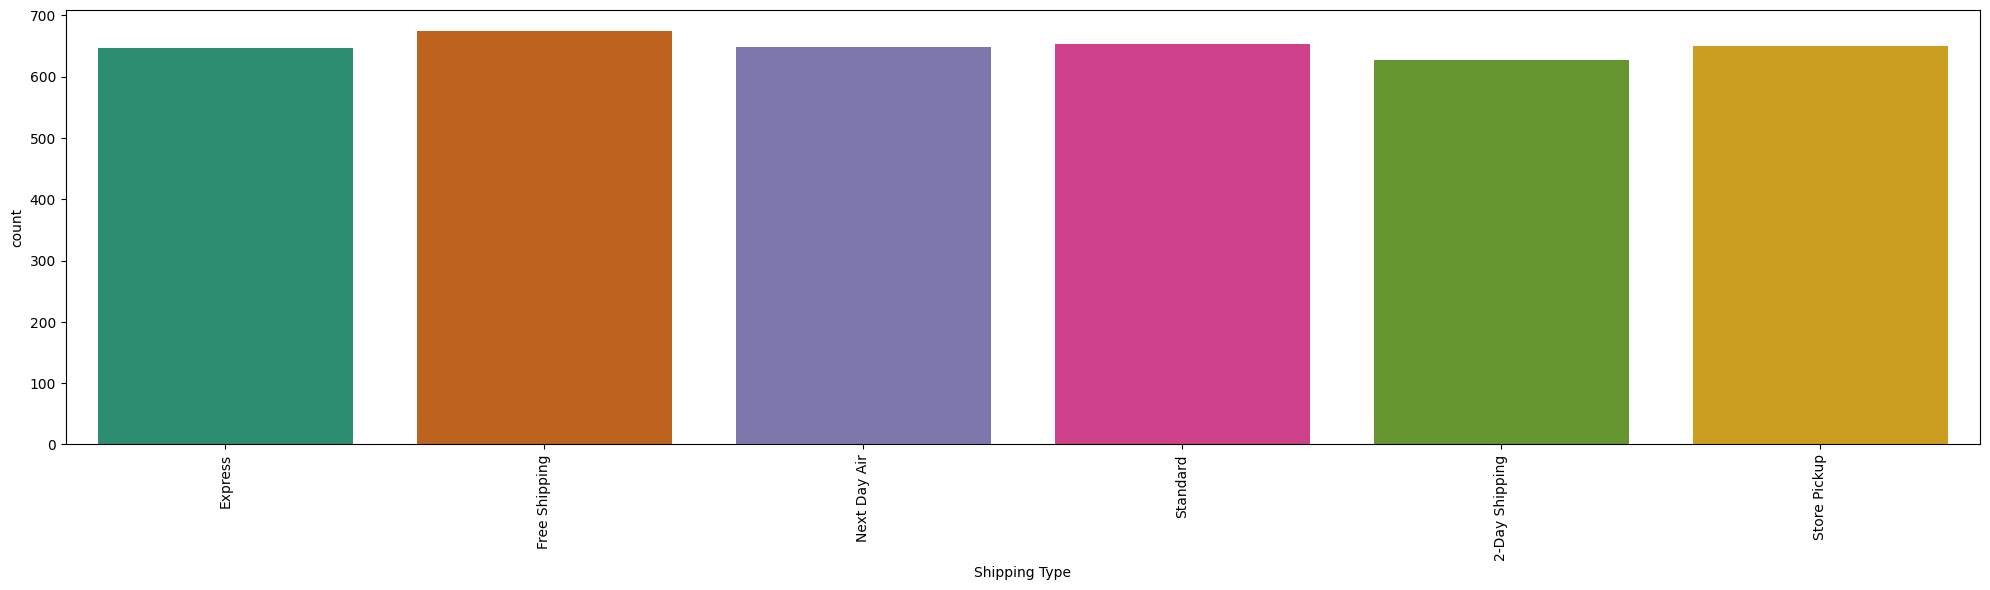

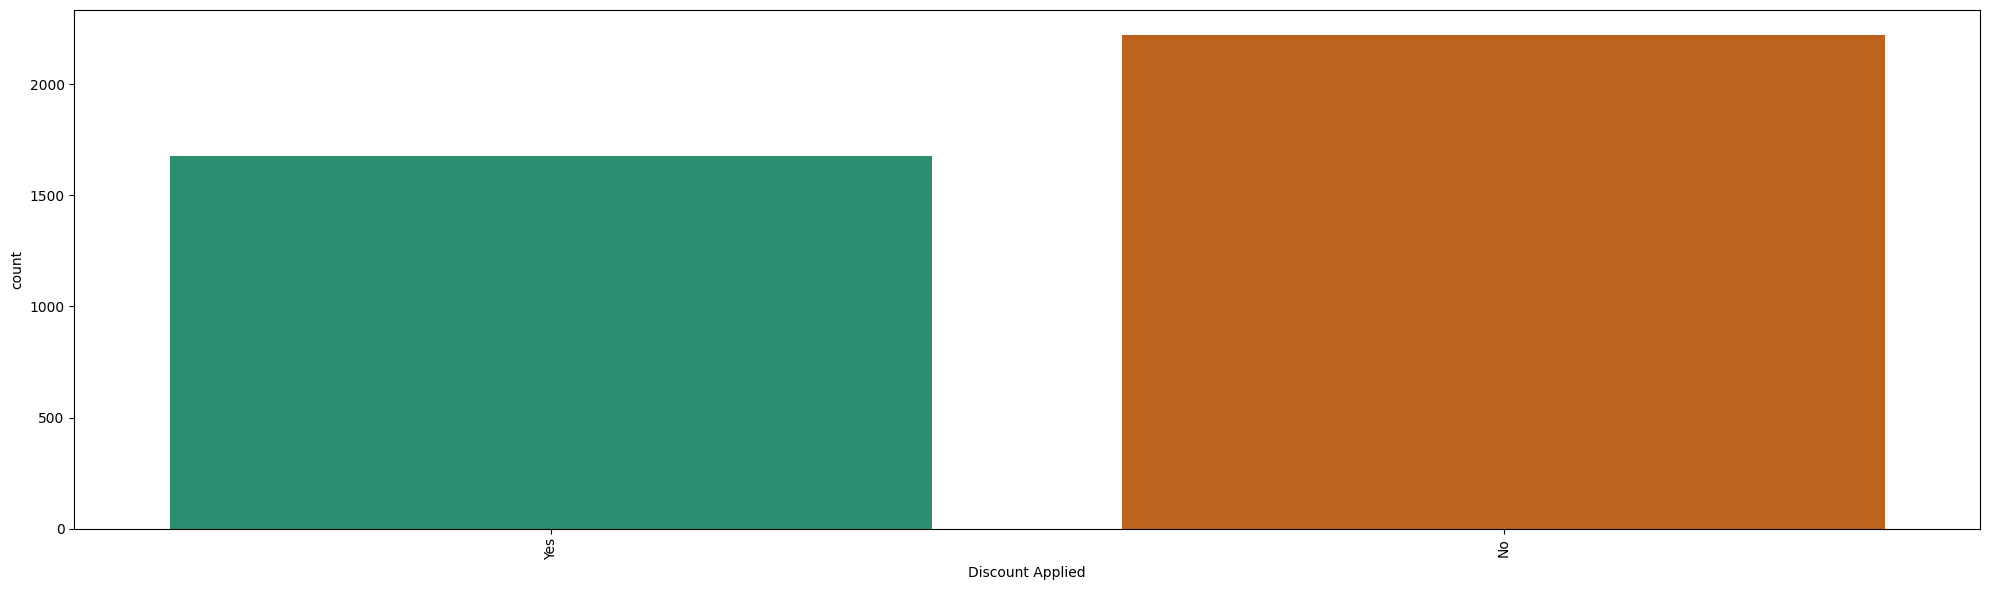

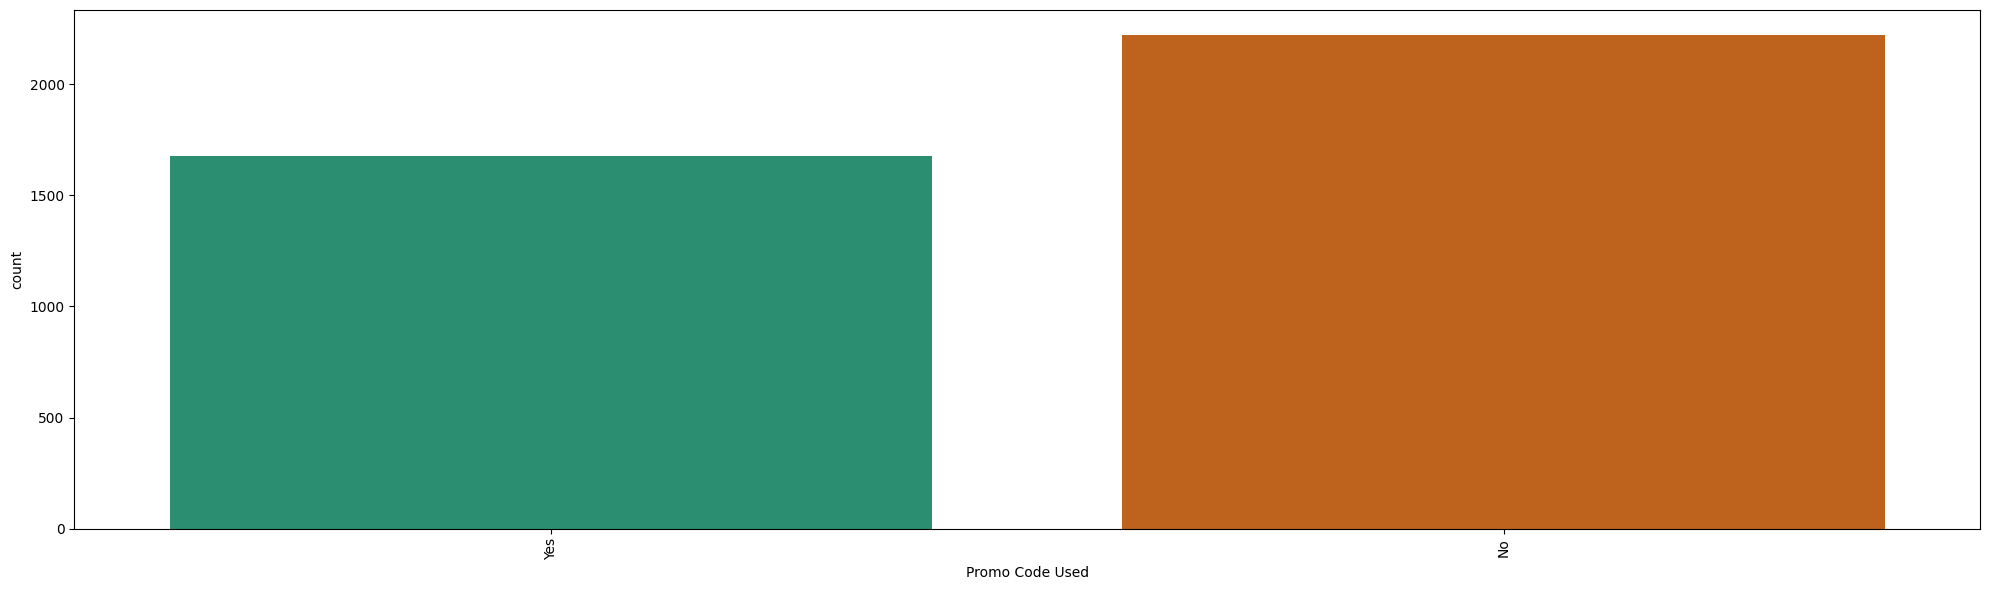

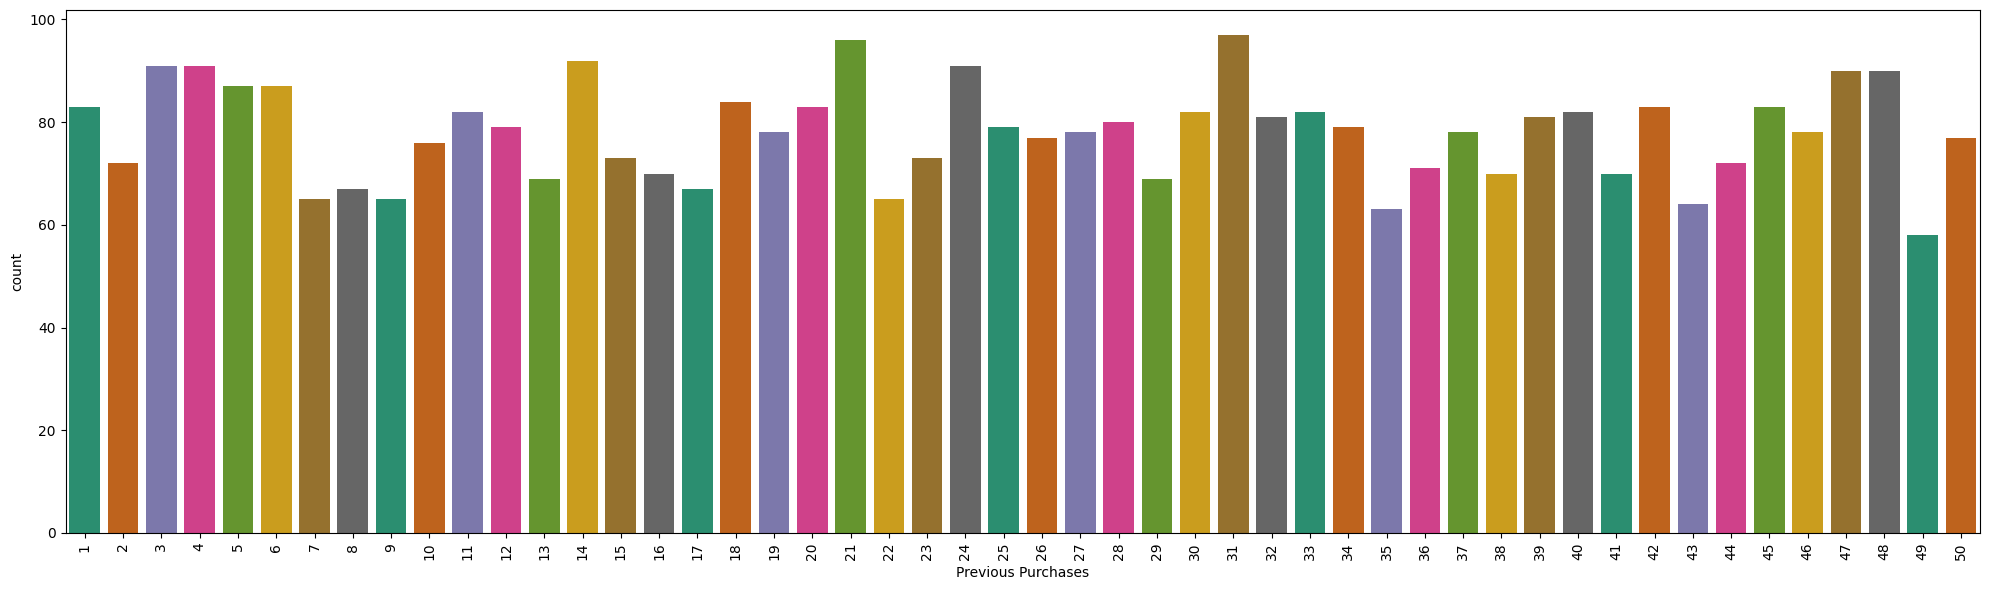

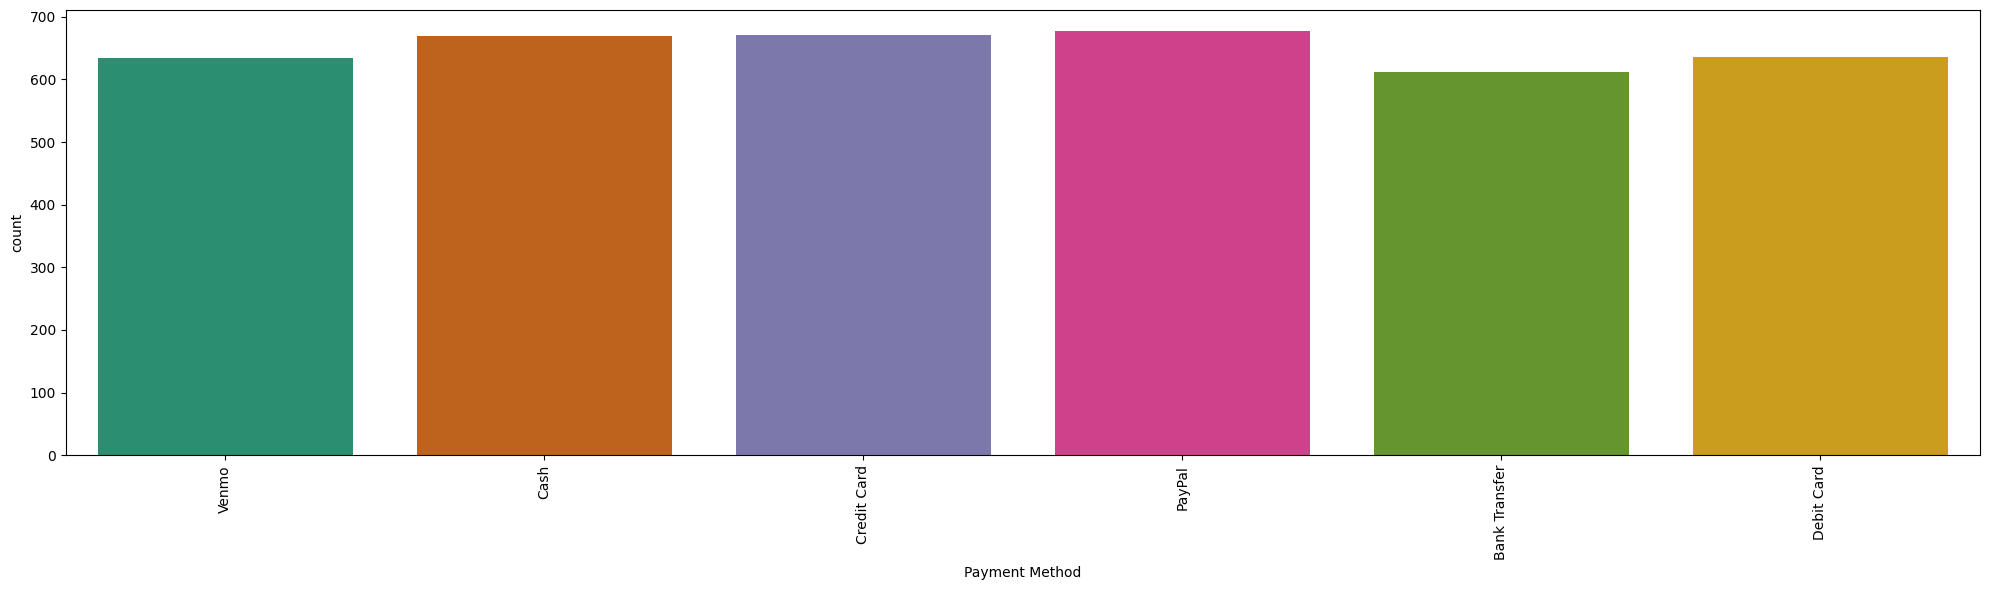

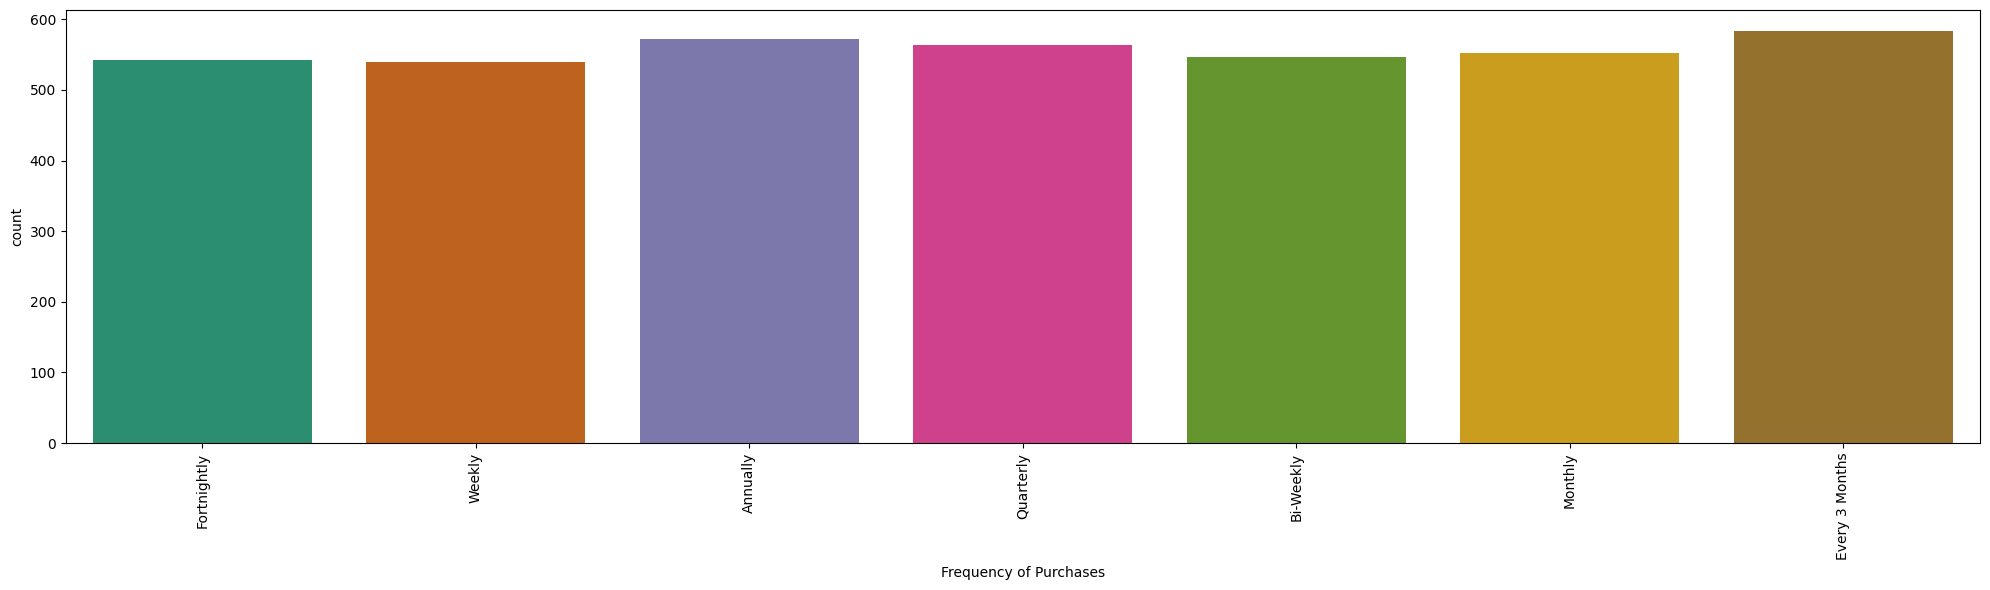

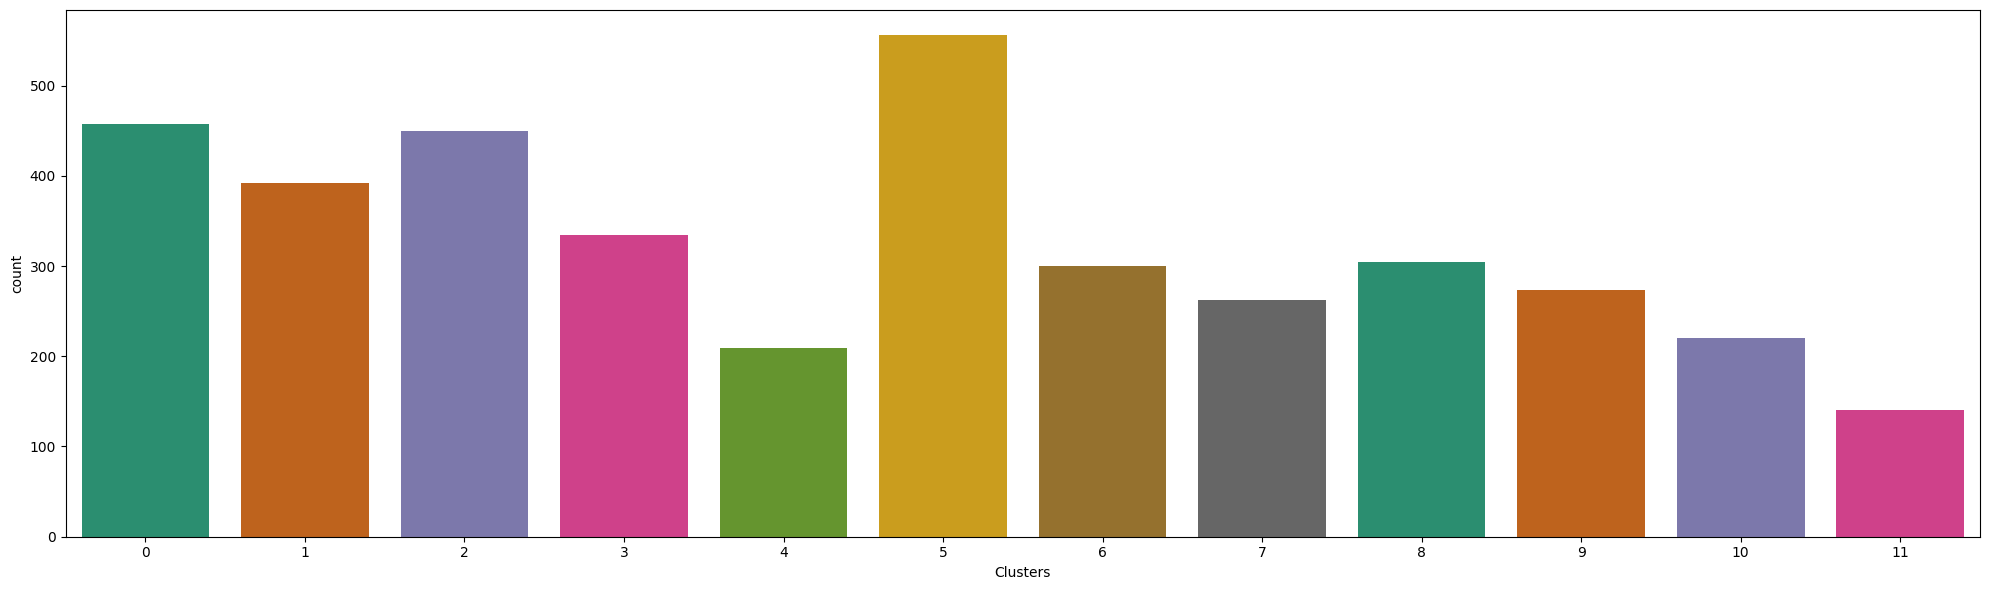

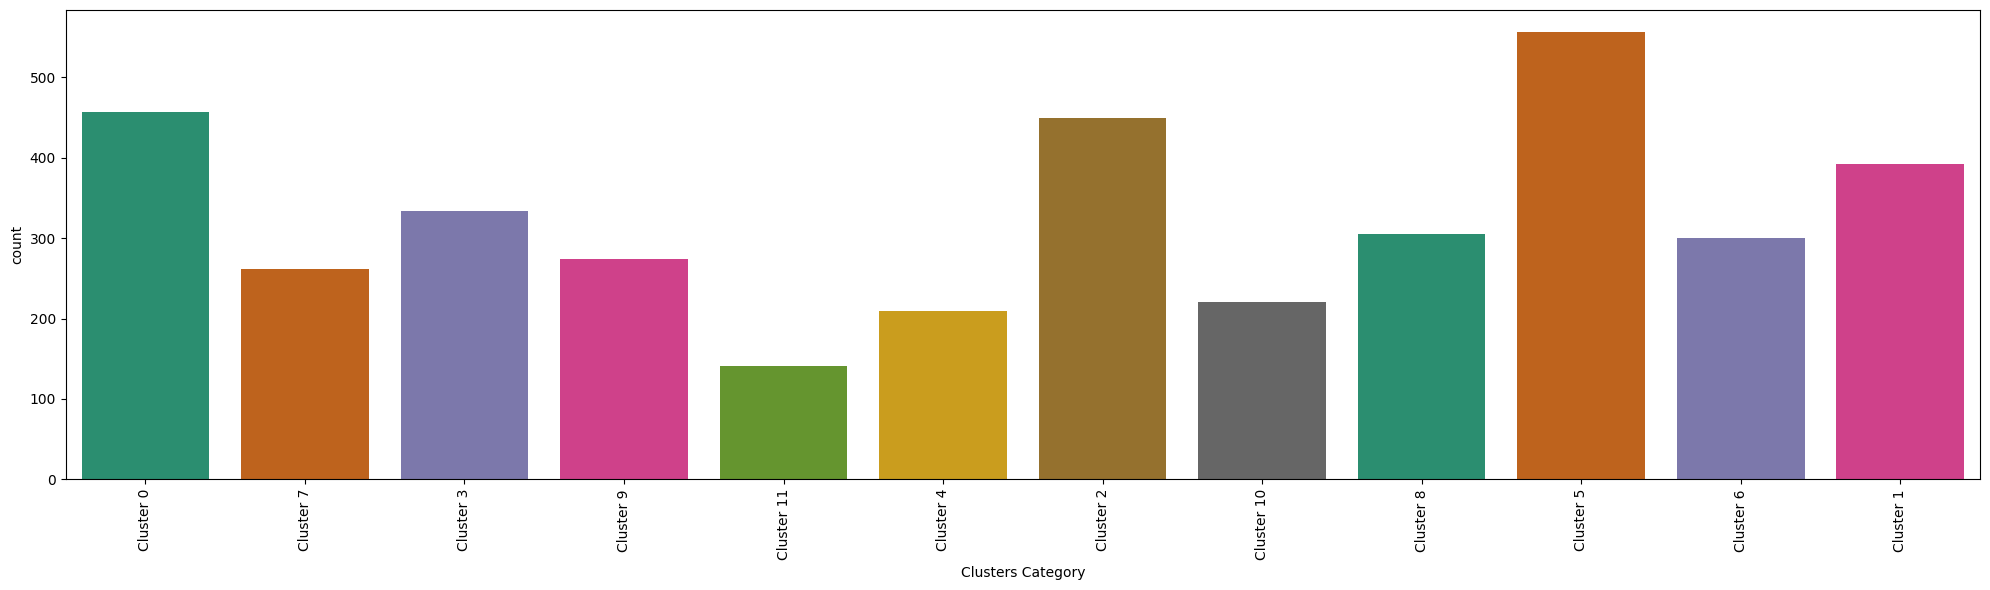

In [ ]:
for f in features:
    # Adjusting figure size
    plt.figure(figsize=(20, 6))
    sns.countplot(x=f, data=raw_data, palette='Dark2',hue=f,legend=False)

    # Adjusting x-axis ticks for the "Clusters" column
    if f == "Clusters":
        # Getting cluster counts
        cluster_counts = raw_data.groupby('Clusters').size().reset_index(name='Count')

        # Updating x-axis ticks for "Clusters" column
        plt.xticks(ticks=cluster_counts['Clusters'], labels=cluster_counts['Clusters'])
    else:
        plt.xticks(rotation=90)

    # Adjusting spacing between ticks
    plt.tight_layout()
    plt.show()

In [ ]:
# Creating a barplot with correlation coefficients and feature names
def plot_correlation_barplot(series, feature):
    plt.figure(figsize=(10, 8))
    sns.barplot(x=series.values, y=series.index, palette="coolwarm",hue=series.index,legend=False,dodge=False)
    plt.title(f"Correlation with Purchase Amount (USD) by {feature}")
    plt.xlabel(f"Correlation Coefficient")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.plot()

In [ ]:
# Returning dictionaries containing max and min correlation for each feature
def analyze_correlation(features, correlation_series):
    max_correlation = {}
    min_correlation = {}

    for feature in features:
        # Filtering the correlation series to include only correlations related to the current feature
        filtered_series = correlation_series[correlation_series.index.str.contains(feature)]
        # Ploting a correlation barplot for the current feature
        plot_correlation_barplot(filtered_series, feature)

        max_feature = filtered_series.idxmax()
        max_correlation[feature] = (max_feature, filtered_series.max())

        min_feature = filtered_series.idxmin()
        min_correlation[feature] = (min_feature, filtered_series.min())

    return max_correlation, min_correlation

In [ ]:
#Making a copy of orijinal data
new_data= raw_data.copy()
#Excluding ID column
new_data = new_data[features]
#Selecting categorical columns
categorical_columns = new_data.select_dtypes(include=['object']).columns
#Converting categorical columns into numerical columns
new_data = pd.get_dummies(new_data, columns = categorical_columns,dtype=int)

Max correlation for Season: ('Season_Fall', 0.04370077835279646)
Min correlation for Season: ('Season_Summer', -0.03268082577081706)

Max correlation for Color: ('Color_Green', 0.05337973507913605)
Min correlation for Color: ('Color_Turquoise', -0.03443986541200366)

Max correlation for Method: ('Payment Method_Debit Card', 0.021448851758272637)
Min correlation for Method: ('Payment Method_Venmo', -0.015159322945059126)

Max correlation for Shipping: ('Shipping Type_2-Day Shipping', 0.017913939377557572)
Min correlation for Shipping: ('Shipping Type_Standard', -0.024717548027814427)

Max correlation for Frequency: ('Frequency of Purchases_Bi-Weekly', 0.01586694789346791)
Min correlation for Frequency: ('Frequency of Purchases_Weekly', -0.013395645568599034)

Max correlation for Location: ('Location_Alaska', 0.04536030149675879)
Min correlation for Location: ('Location_Connecticut', -0.03368916698068774)

Max correlation for Item: ('Item Purchased_T-shirt', 0.026300839566449356)
Min cor

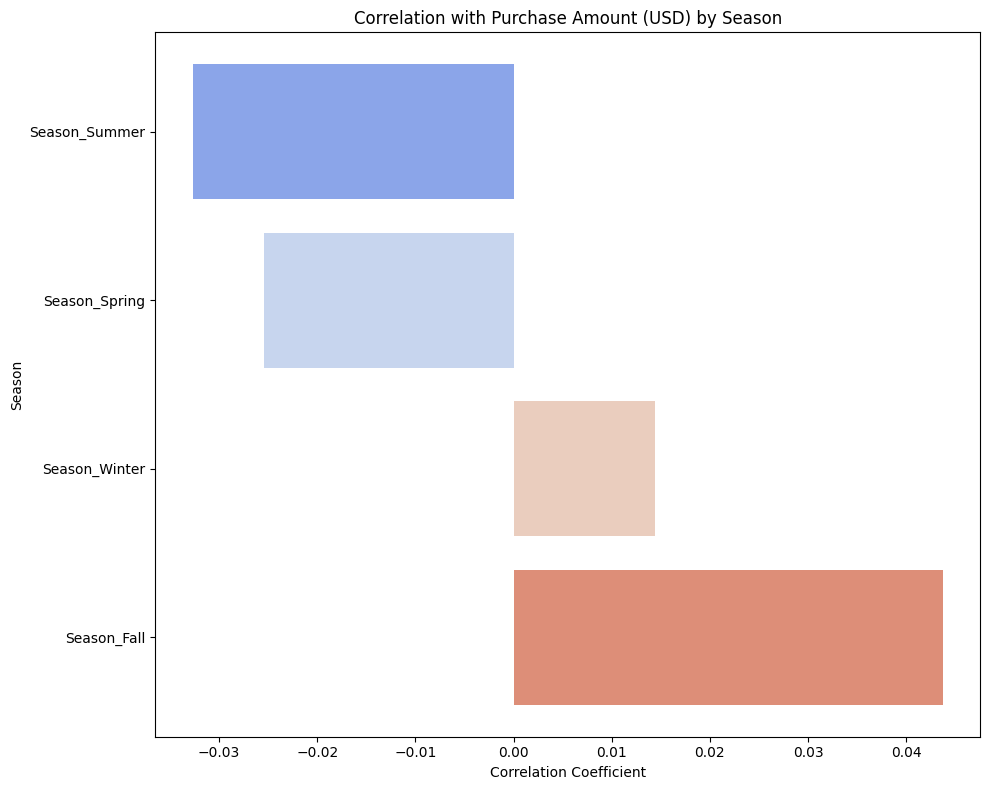

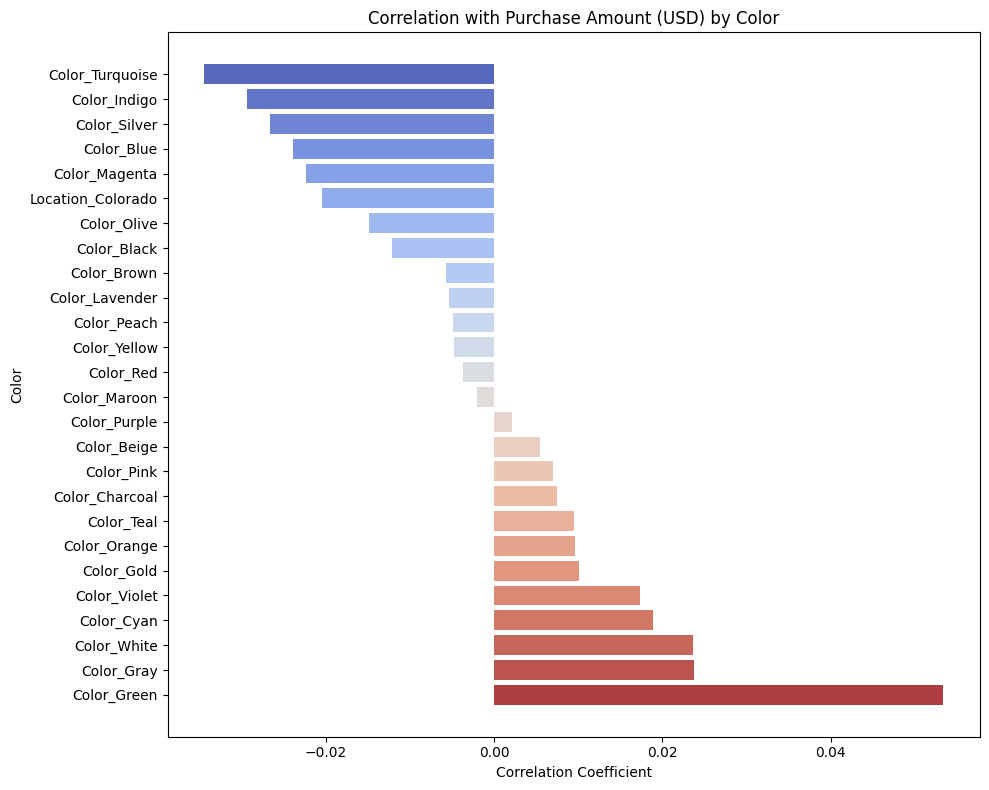

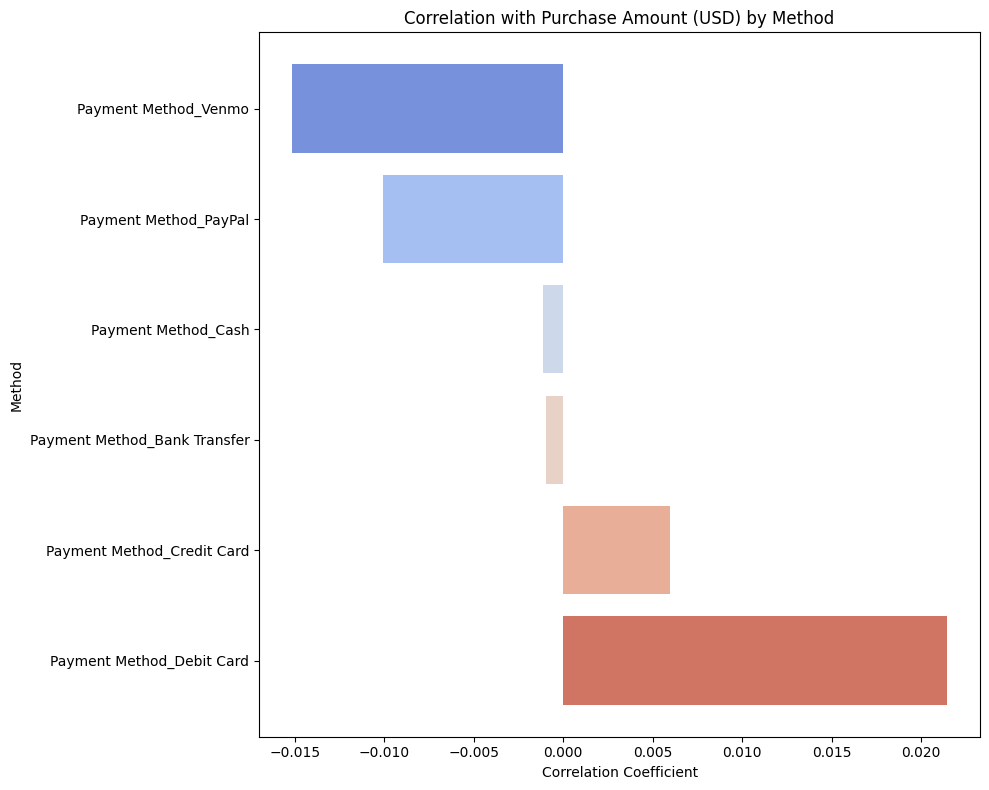

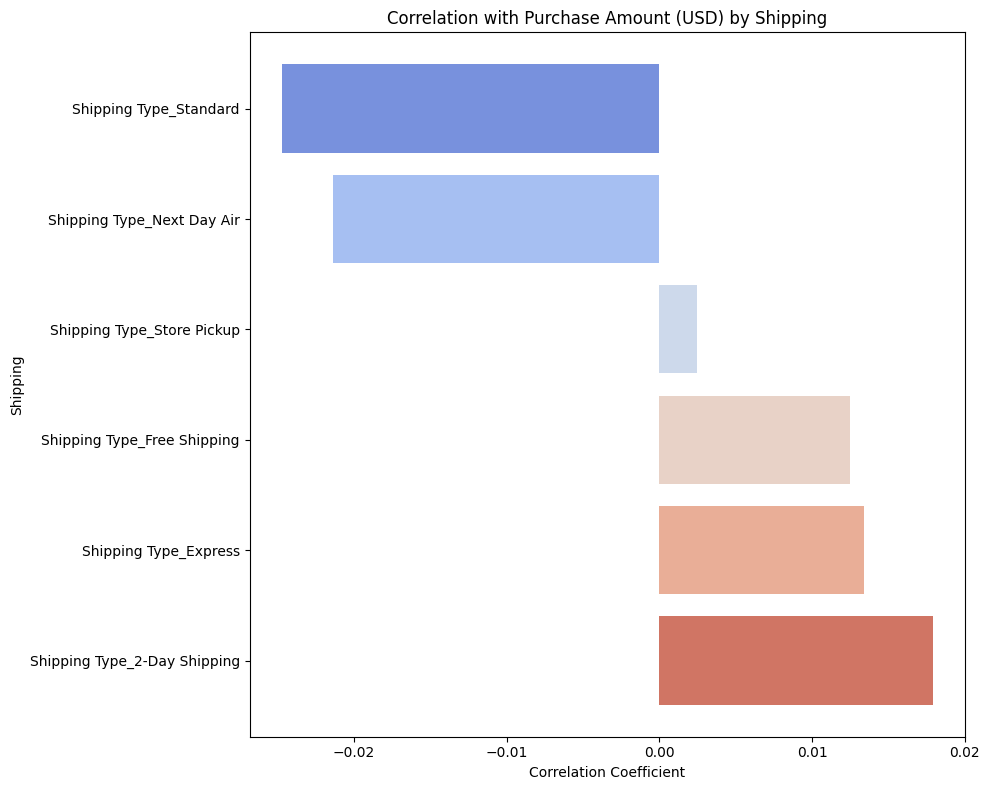

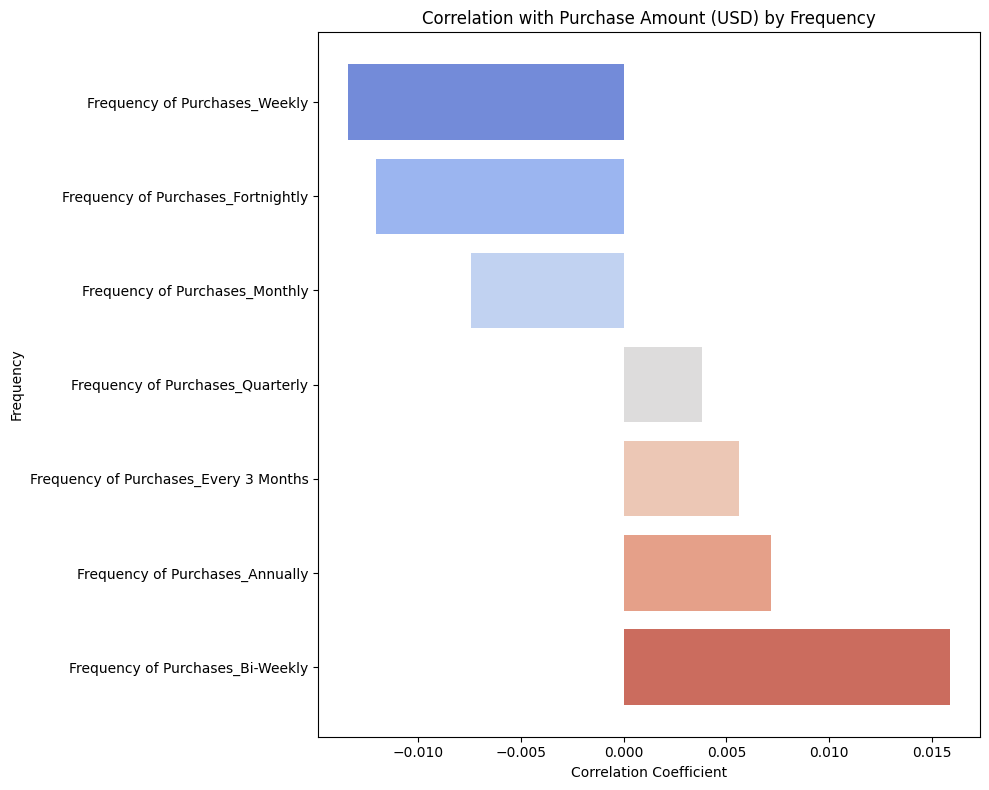

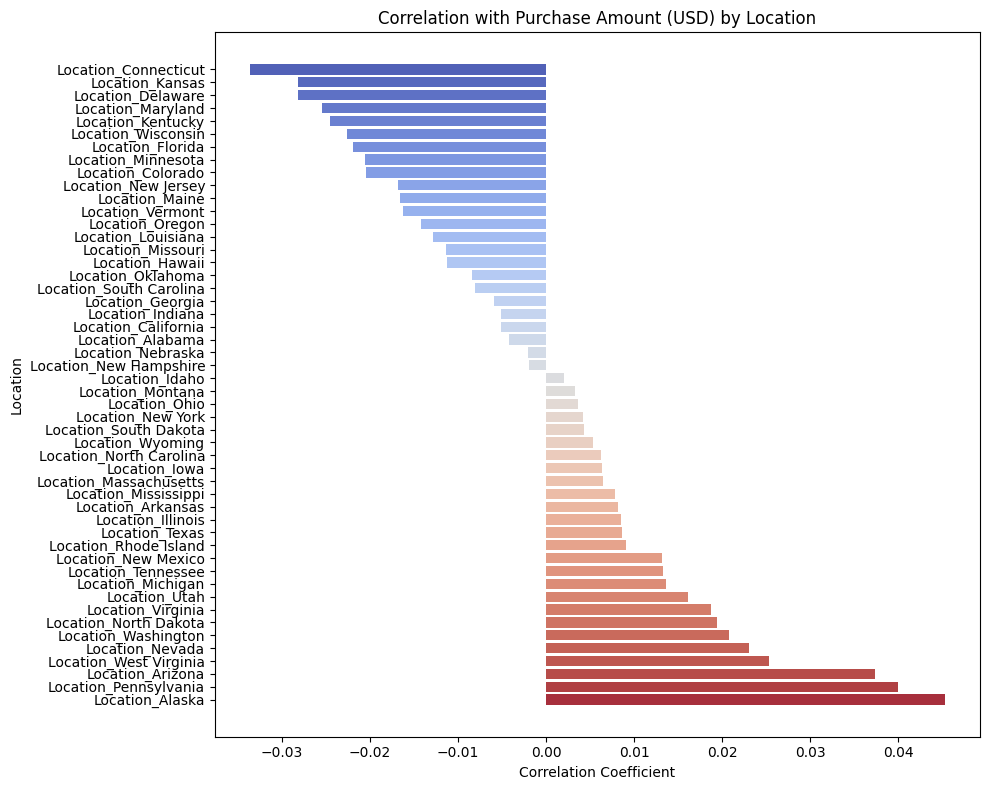

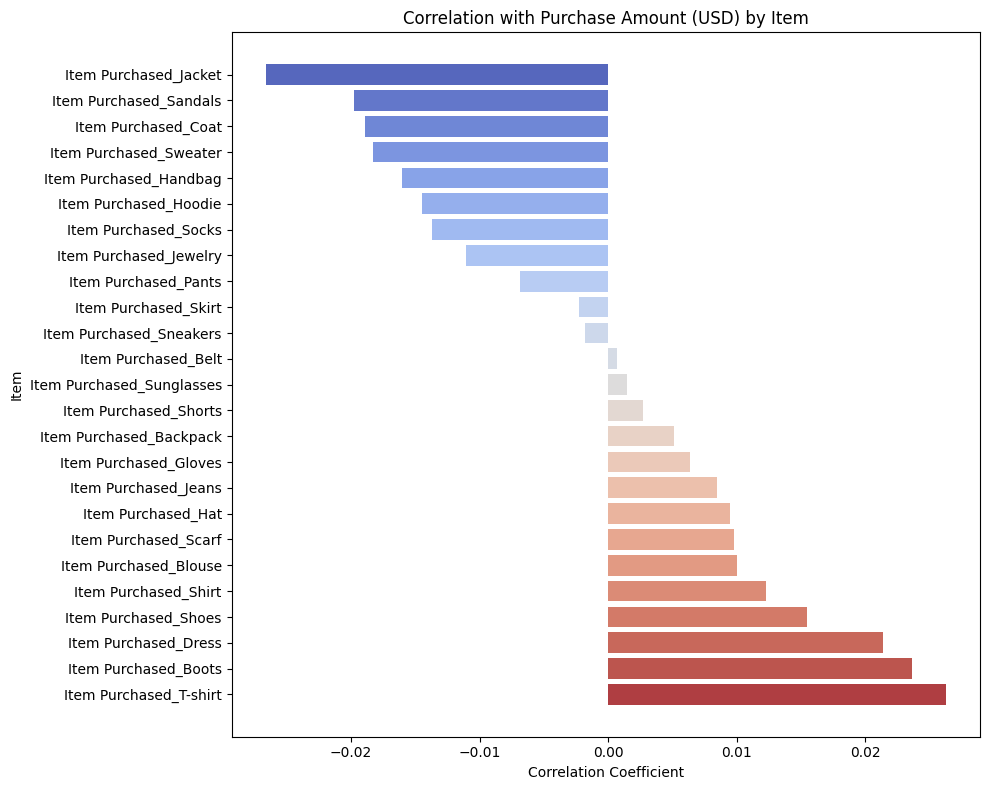

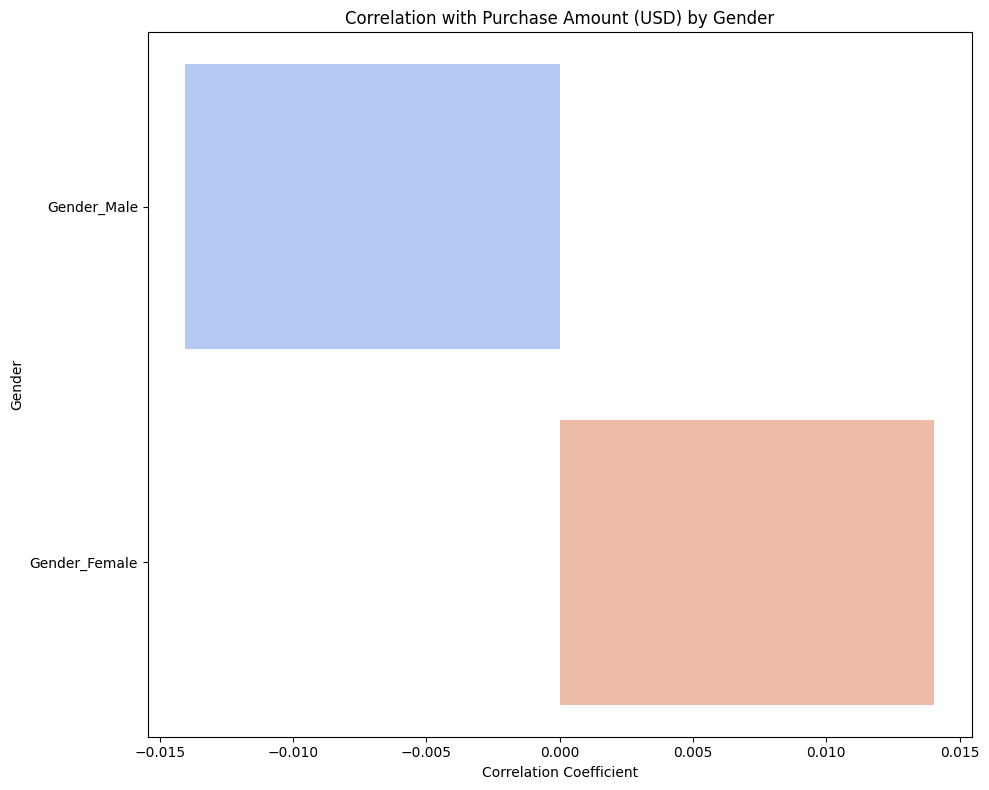

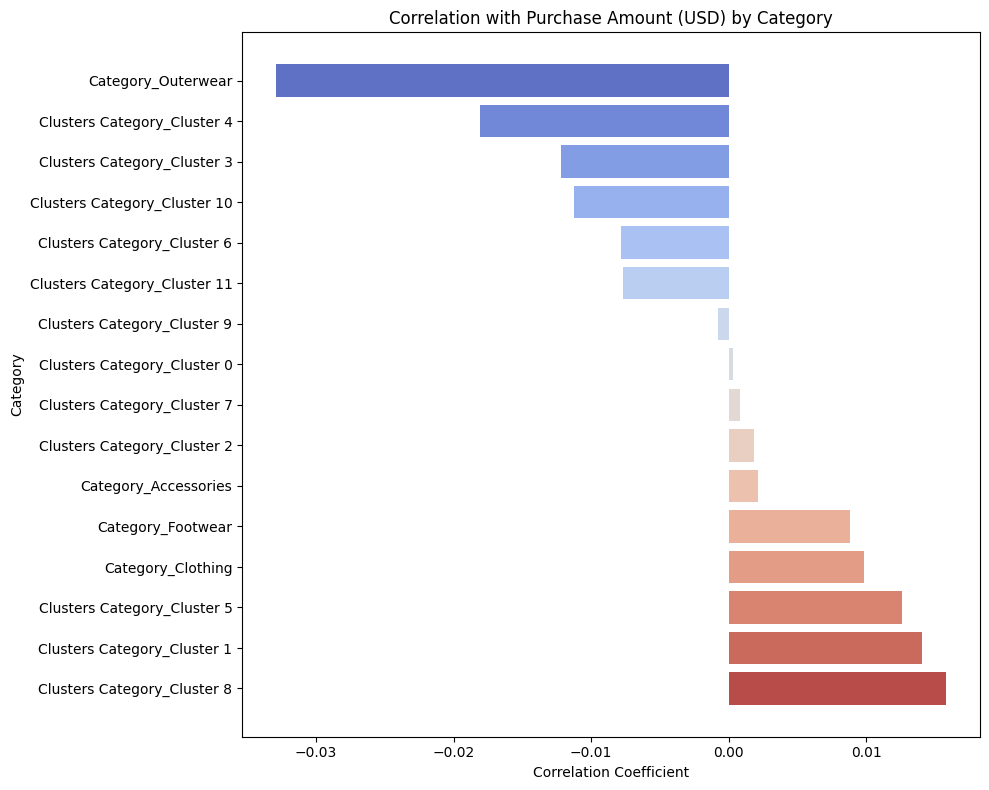

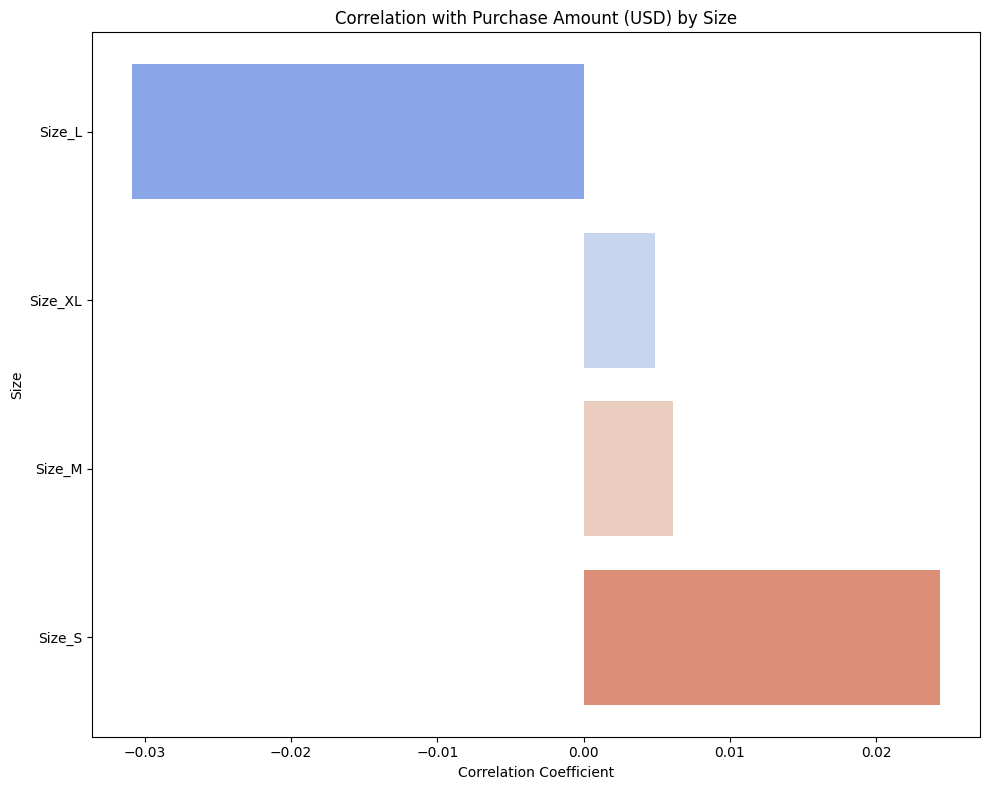

In [ ]:
# Calculating correlation matrix
correlation_matrix = new_data.corr()

# Extracting correlation with purchase amount
purchase_correlation = correlation_matrix["Purchase Amount (USD)"].sort_values()

# Interested features
selected_features = ["Season","Color","Method","Shipping","Frequency","Location","Item","Gender","Category","Size",]

# Analyzing correlation for each feature
max_correlation, min_correlation = analyze_correlation(selected_features, purchase_correlation)

# Printing results
for feature in selected_features:
    print(f"Max correlation for {feature}: {max_correlation[feature]}")
    print(f"Min correlation for {feature}: {min_correlation[feature]}")
    print()

In [ ]:
#Initializing number of clusters
num_of_clusters=len(set(raw_data['Clusters']))

In [ ]:
# Setting up the Dash web application
app = dash.Dash(__name__)

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1('Customer Type Analysis Dashboard'),

    # Dropdown for selecting column (used in both charts)
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in raw_data.columns],
        value=raw_data.columns[0],  # Setting default value
        multi=False,
        clearable=False
    ),

    # Graph component for displaying cluster distribution per selected column
    dcc.Graph(id='cluster-bar-chart'),

    # Dropdowns for selecting features for scatter plot
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': col, 'value': col} for col in raw_data.columns],
        value=raw_data.columns[1],  # Setting default value
        clearable=False
    ),

    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in raw_data.columns],
        value=raw_data.columns[2],  # Setting default value
        clearable=False
    ),

    # Dropdown for selecting cluster
    dcc.Dropdown(
        id='cluster-dropdown',
        options=[{'label': f'Cluster {i}', 'value': i} for i in range(0, num_of_clusters)],
        value=0,  # Setting default value
        clearable=False
    ),

    # Graph component for displaying scatter plot
    dcc.Graph(id='cluster-scatter-plot'),

    # Graph component for displaying scatter plot
    dcc.Graph(id='cluster-bar-plot'),

    # Graph component for displaying scatter plot of all clusters together
    dcc.Graph(id='all-clusters-scatter-plot'),

    # Graph component for displaying bar chart of all clusters together
    dcc.Graph(id='all-clusters-bar-chart'),
])

# Callback function to update the bar chart based on dropdown selection
@app.callback(
    Output('cluster-bar-chart', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_cluster_bar_chart(selected_column):
    try:
        # Grouping data by selected column and clusters, and counting occurrences
        cluster_counts = raw_data.groupby([selected_column, 'Clusters']).size().reset_index(name='Count')
        # Sorting the DataFrame by count in descending order
        cluster_counts_sorted = cluster_counts.sort_values(by='Count', ascending=False)
        # Creating a grouped bar chart
        fig = px.bar(cluster_counts_sorted, x=selected_column, y='Count', color='Clusters', barmode='group',color_discrete_sequence=colors)
        fig.update_layout(title=f'Cluster Distribution for {selected_column}')
        return fig
    except Exception as e:
        print(f"Error: {e}")
        return {}

# Callback function to update scatter plot based on selected features and cluster
@app.callback(
    Output('cluster-scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value'),
     Input('cluster-dropdown', 'value')]
)
def update_cluster_scatter_plot(x_axis, y_axis, selected_cluster):
    # Filtering data for the selected cluster
    cluster_data = raw_data[raw_data['Clusters'] == selected_cluster]

    # Creating scatter plot
    fig = px.scatter(cluster_data, x=x_axis, y=y_axis, color='Clusters',
                     title=f'{x_axis} vs {y_axis} - Cluster {selected_cluster}',color_discrete_sequence=colors)

    return fig

# Callback function to update bar plot based on selected features and cluster
@app.callback(
    Output('cluster-bar-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value'),
     Input('cluster-dropdown', 'value')]
)
def update_cluster_bar_plot(x_axis, y_axis, selected_cluster):
    # Filtering data for the selected cluster
    cluster_data = raw_data[raw_data['Clusters'] == selected_cluster]

    # Determining which axis contains the numerical column
    numerical_axis = x_axis if x_axis in cluster_data.columns and cluster_data[x_axis].dtype in ['int64', 'float64'] else y_axis

    # Sorting the DataFrame based on the numerical column
    cluster_data_sorted = cluster_data.sort_values(by=numerical_axis)

    # Creating bar plot
    fig = px.bar(cluster_data, x=x_axis, y=y_axis, color='Clusters',
                     title=f'{x_axis} vs {y_axis} - Cluster {selected_cluster}',color_discrete_sequence=colors)

    return fig

# Callback function to update scatter plot of all clusters together based on selected features
@app.callback(
    Output('all-clusters-scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value')]
)
def update_all_clusters_scatter_plot(x_axis, y_axis):
    # Creating scatter plot for all clusters
    fig = px.scatter(raw_data, x=x_axis, y=y_axis, color='Clusters',
                     title=f'{x_axis} vs {y_axis} - All Clusters',color_discrete_sequence=colors)

    return fig

# Callback function to update bar chart of all clusters together based on selected features
@app.callback(
    Output('all-clusters-bar-chart', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value')]
)
def update_all_clusters_bar_chart(x_axis, y_axis):

    # Determining which axis contains the numerical column
    numerical_axis = x_axis if x_axis in raw_data.columns and raw_data[x_axis].dtype in ['int64', 'float64'] else y_axis

    # Sorting the DataFrame based on the numerical column
    raw_data_sorted = raw_data.sort_values(by=numerical_axis)

    # Creating bar chart for all clusters using 'Clusters Category'
    fig = px.bar(raw_data_sorted, x=x_axis, y=y_axis, color='Clusters Category',
                 title=f'{x_axis} vs {y_axis} - All Clusters',color_discrete_sequence=colors)

    return fig

# Running the web application
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>